**3D Convolution operation realisation.**

Auxiliary functions

In [ ]:
import numpy as np
import math
from PIL import Image
from google.colab import drive

In [ ]:
def plot_image(image):
  for i in range(len(image)):
    print(f"Channel: {i}")
    for j in range(len(image[i])):
      for k in range(len(image[i][j])):
        print(f" {image[i][j][k]}", end="")
      print("\n")

In [ ]:
def add_padding(image, padding):
  for i in range(len(image)):
    image[i] = [[0] * len(image[i][0])] * padding + image[i] + [[0] * len(image[i][0])] * padding
    for j in range(len(image[i])):
      image[i][j] = padding*[0] + image[i][j] + padding*[0]
  return image

In [ ]:
def calculate_dim_out(h_in, w_in, kernel, stride, padding):
  kernel_height = len(kernel)
  kernel_width = len(kernel[0])
  h_out = round( ((h_in - kernel_width + 2*padding) / stride[0] ) + 1)
  w_out = round( ((w_in - kernel_height + 2*padding) / stride[1] ) + 1)
  return h_out, w_out

In [ ]:
def conv2d(image, kernel, stride, h_in, w_in):
  image = np.array(image)
  kernel = np.transpose(kernel)
  size = len(kernel[0])
  image_out = []
  for i in range(0, len(image)-size+1, stride[0]):
    for j in range(0, len(image[i])-size+1, stride[1]):
        element = np.sum(np.multiply(image[i:i+size, j:j+size], np.array(kernel)))
        image_out.append(element)
  image_out = np.array(image_out)
  h_out, w_out = calculate_dim_out(h_in, w_in, kernel, stride, padding)
  image_out = image_out.reshape(h_out, w_out)
  return image_out

Main function

In [ ]:
def conv3d(image, kernel, padding, stride):
  assert len(image) == len(kernel), "Image and kernel should have the same depth"

  h_in = len(image[0])
  w_in = len(image[0][0])
  image = add_padding(image, padding) # Adding padding to an image

  #plot_image(image)                   # Plotting image , was used during testing function

  image_out = []
  #Applying 2d convolution operation to each of the channel
  for i in range(len(image)):
    image_out.append(conv2d(image[i], kernel[i], stride, h_in, w_in))

  #plot_image(image_out)               # Plotting transformed image, was used during testing function

  return image_out

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive



**Usage example 1**

In [ ]:
image_path = '/content/drive/My Drive/Colab Notebooks/HW6/engine.png'
image = Image.open(image_path)
image = np.array(image)
image_decomposed = [image[:, :, 0].tolist(), image[:, :, 1].tolist(), image[:, :, 2].tolist()]

kernel = [
          [
              [-1, -1, -1],
              [-1, 8, -1],
              [-1, -1, -1]
          ],
          [
              [-1, -1, -1],
              [-1, 8, -1],
              [-1, -1, -1]
          ],
          [
              [-1, -1, -1],
              [-1, 8, -1],
              [-1, -1, -1]
          ]
         ]

stride = [1,1]
padding = 1

result = conv3d(image_decomposed, kernel, padding, stride)

output_image = np.stack([result[0], result[1], result[2]], axis=-1)
output_image = np.clip(output_image, 0, 255).astype(np.uint8)

output = Image.fromarray(output_image)
output.save("/content/drive/My Drive/Colab Notebooks/HW6/engine_processed.png")

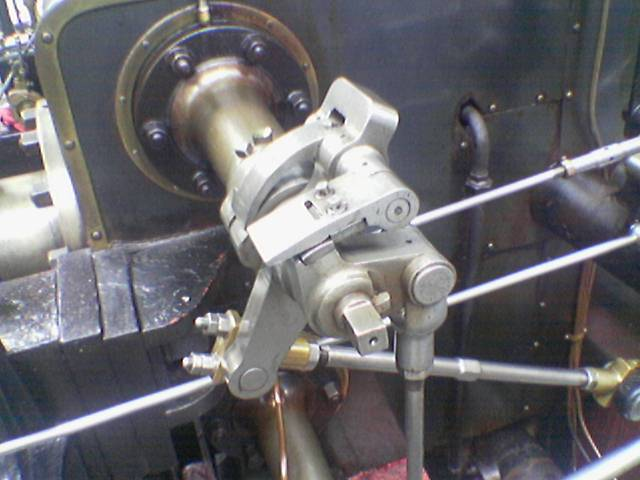

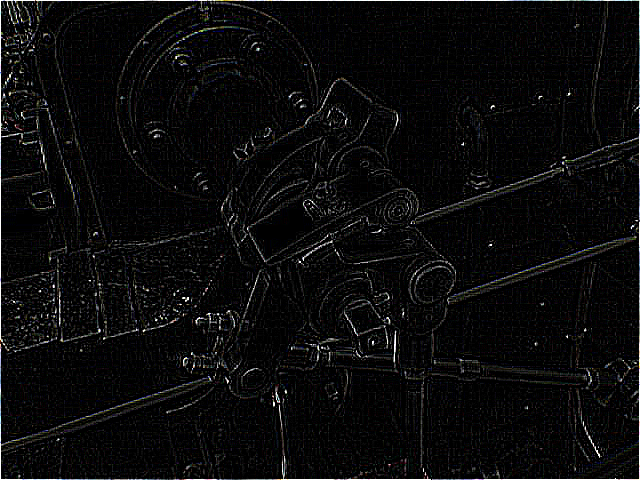

Can be seen that after applying specific kernel processed image contains ridges and edges of objects present in initial image. This can be used to highlight main object boundaries present in image, to denoise data, to reduce amount of unimportant information present in images, etc.  
As can be seen fucntion written at the beginning works correctly.

**Usage example 2**

In [ ]:
image_path = '/content/drive/My Drive/Colab Notebooks/HW6/anim.png'
image = Image.open(image_path)
image = np.array(image)
image_decomposed = [image[:, :, 0].tolist(), image[:, :, 1].tolist(), image[:, :, 2].tolist()]

kernel = [
          [
              [1/9, 1/9, 1/9],
              [1/9, 1/9, 1/9],
              [1/9, 1/9, 1/9]
          ],
          [
              [1/9, 1/9, 1/9],
              [1/9, 1/9, 1/9],
              [1/9, 1/9, 1/9]
          ],
          [
              [1/9, 1/9, 1/9],
              [1/9, 1/9, 1/9],
              [1/9, 1/9, 1/9]
          ]
         ]

stride = [1,1]
padding = 1

result = conv3d(image_decomposed, kernel, padding, stride)

output_image = np.stack([result[0], result[1], result[2]], axis=-1)
output_image = np.clip(output_image, 0, 255).astype(np.uint8)

output = Image.fromarray(output_image)
output.save("/content/drive/My Drive/Colab Notebooks/HW6/anim_processed.png")

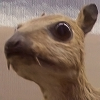

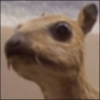

Can be seen that after applying this specific kernel initial image got blurred at the end. This type of convolution kernel can be used to compress images, reduce their size, add some noise to data, etc.   
As wee see function written at the beginning works correctly.

**Sobel kernel**

In [ ]:
image_path = '/content/drive/My Drive/Colab Notebooks/HW6/cat.jpg'
image = Image.open(image_path)
image = np.array(image)
image_decomposed1 = [image[:, :, 0].tolist(), image[:, :, 1].tolist(), image[:, :, 2].tolist()]
image_decomposed2 = [image[:, :, 0].tolist(), image[:, :, 1].tolist(), image[:, :, 2].tolist()]

kernel_gx = [
    [
        [1, 0, -1],
        [2, 0, -2],
        [1, 0, -1]
    ],
    [
        [1, 0, -1],
        [2, 0, -2],
        [1, 0, -1]
    ],
    [
        [1, 0, -1],
        [2, 0, -2],
        [1, 0, -1]
    ]
]

kernel_gy = [
    [
        [1, 2, 1],
        [0, 0, 0],
        [-1, -2, -1]
    ],
    [
        [1, 2, 1],
        [0, 0, 0],
        [-1, -2, -1]
    ],
    [
        [1, 2, 1],
        [0, 0, 0],
        [-1, -2, -1]
    ]
]

stride = [1, 1]
padding = 1


result_gx = conv3d(image_decomposed1, kernel_gx, padding, stride)
result_gy = conv3d(image_decomposed2, kernel_gy, padding, stride)

combined_result = [
    np.sqrt(np.square(np.array(result_gx[0])) + np.square(np.array(result_gy[0]))).tolist(),
    np.sqrt(np.square(np.array(result_gx[1])) + np.square(np.array(result_gy[1]))).tolist(),
    np.sqrt(np.square(np.array(result_gx[2])) + np.square(np.array(result_gy[2]))).tolist()
]

output_image = np.stack([combined_result[0], combined_result[1], combined_result[2]], axis=-1)
output_image = np.clip(output_image, 0, 255).astype(np.uint8)

output = Image.fromarray(output_image)
output.save("/content/drive/My Drive/Colab Notebooks/HW6/cat_processed.png")

Were applied two different components of Sobel operators to an initial image, then those two distinct outputs (after convolutions) were combined into one. The first component of Sobel operators is denoted as Gy , the second one is denoted as Gx. The first one detects vertical boundaries of shapes and the second one detects horizontal boundaries of shapes, very roughly speaking.

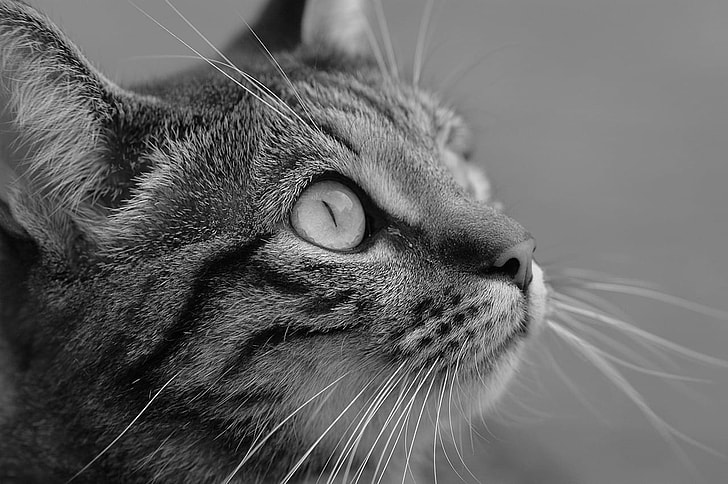

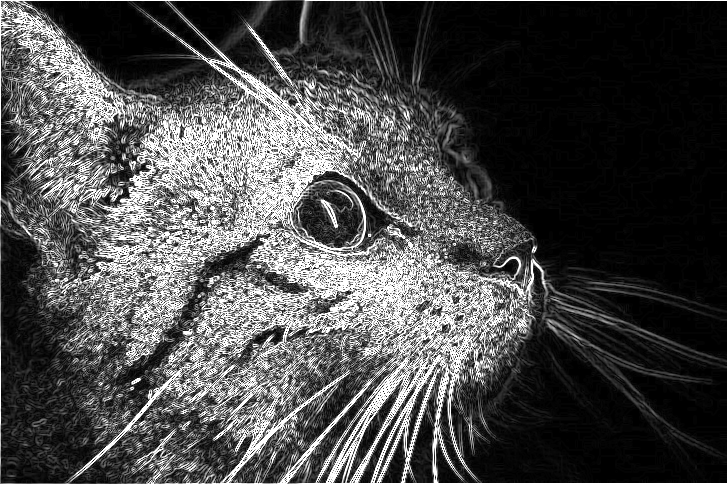

After applying Sobel operator to initial grayscale image, edges and ridges presented on image were perfectly identified. Were identified such elemnts of cat image: nose, ears, eyes, whiskers, fur (details of it).

After seeing numerous examples of applying written in this notebook convolution function can be concluded that it operates correctly.

3d convolution operation, as was seen, can be used for processing images, taking out important information from images, compressing images (like with example of an image that got blurred after convolution operation with special kernel), decomposing images , etc.

You are able to access images pasted in this notebook, just look for them in folder where all files regarding this homewrok are located.